In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

In [5]:
# Đọc dữ liệu
data = pd.read_csv("data.csv", keep_default_na=False)

# Hiển thị tên các cột
columns_list = [[index + 1, column] for index, column in enumerate(data.columns.tolist())]
print("Danh sách các cột trong dữ liệu:")
print(tabulate(columns_list, headers=["STT", "Tên cột"], tablefmt="pretty"))
print()

print("Thông tin thống kê dữ liệu:")
print(data.info())
print("\nThống kê mô tả:")
print(data.describe())
print()

# Xử lý dữ liệu lỗi
print("Kiểm tra giá trị thiếu:")
print(data.isnull().sum())
data = data.dropna()

# Encode các cột phân loại
categorical_cols = [
    "gender",
    "region",
    "income_level",
    "smoking_status",
    "alcohol_consumption",
    "dietary_habits",
    "physical_activity",
    "air_pollution_exposure",
    "stress_level",
    "EKG_results",
]

data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Tách đặc trưng và nhãn
X = data_encoded.drop("heart_attack", axis=1)
y = data_encoded["heart_attack"]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Danh sách các cột trong dữ liệu:
+-----+--------------------------------+
| STT |            Tên cột             |
+-----+--------------------------------+
|  1  |              age               |
|  2  |             gender             |
|  3  |             region             |
|  4  |          income_level          |
|  5  |          hypertension          |
|  6  |            diabetes            |
|  7  |       cholesterol_level        |
|  8  |            obesity             |
|  9  |      waist_circumference       |
| 10  |         family_history         |
| 11  |         smoking_status         |
| 12  |      alcohol_consumption       |
| 13  |       physical_activity        |
| 14  |         dietary_habits         |
| 15  |     air_pollution_exposure     |
| 16  |          stress_level          |
| 17  |          sleep_hours           |
| 18  |    blood_pressure_systolic     |
| 19  |    blood_pressure_diastolic    |
| 20  |      fasting_blood_sugar       |
| 21  |        cholester


PCA giữ lại 31 chiều (để giữ lại 95% phương sai).

Phương sai giải thích của PCA:
Component 1: 0.0467
Component 2: 0.0466
Component 3: 0.0466
Component 4: 0.0463
Component 5: 0.0425
Component 6: 0.0405
Component 7: 0.0395
Component 8: 0.0390
Component 9: 0.0388
Component 10: 0.0386
Component 11: 0.0325
Component 12: 0.0311
Component 13: 0.0310
Component 14: 0.0305
Component 15: 0.0304
Component 16: 0.0293
Component 17: 0.0273
Component 18: 0.0236
Component 19: 0.0236
Component 20: 0.0235
Component 21: 0.0234
Component 22: 0.0234
Component 23: 0.0233
Component 24: 0.0233
Component 25: 0.0232
Component 26: 0.0232
Component 27: 0.0231
Component 28: 0.0231
Component 29: 0.0231
Component 30: 0.0230
Component 31: 0.0230
Tổng phương sai giải thích: 0.9630 (95%)


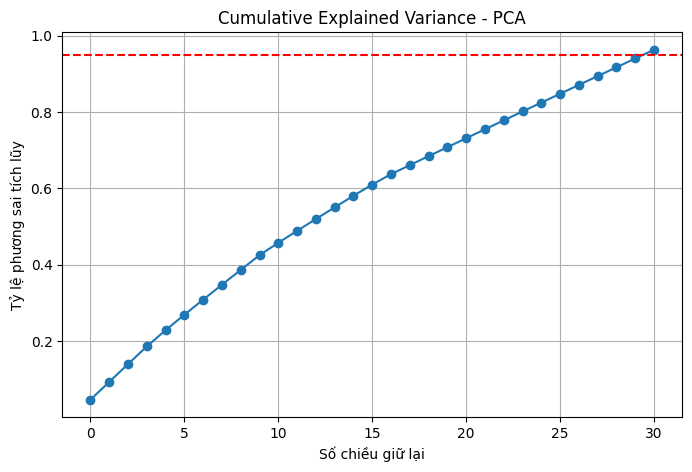

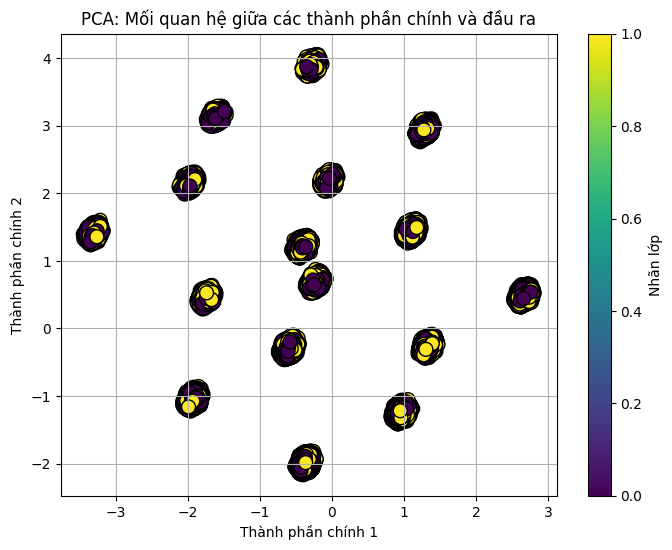


Hệ số tương quan Pearson giữa thành phần PCA 1 và nhãn lớp: 0.0025
Hệ số tương quan Pearson giữa thành phần PCA 2 và nhãn lớp: 0.0039

LDA giảm chiều còn: 1 chiều.

Phương sai giải thích của LDA:
Component 1: 1.0000
Tổng phương sai giải thích: 1.0000


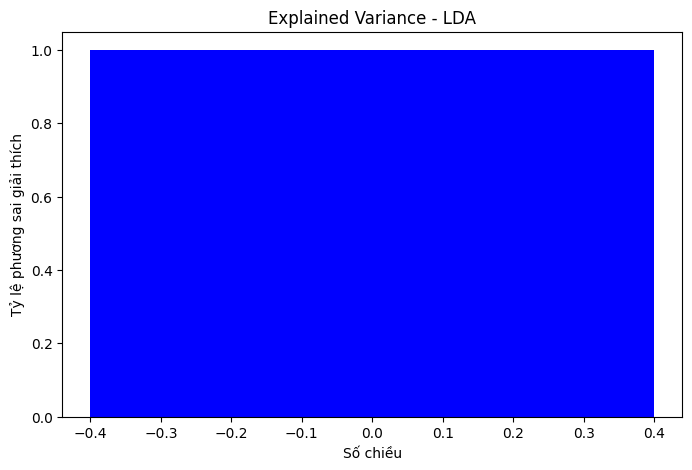

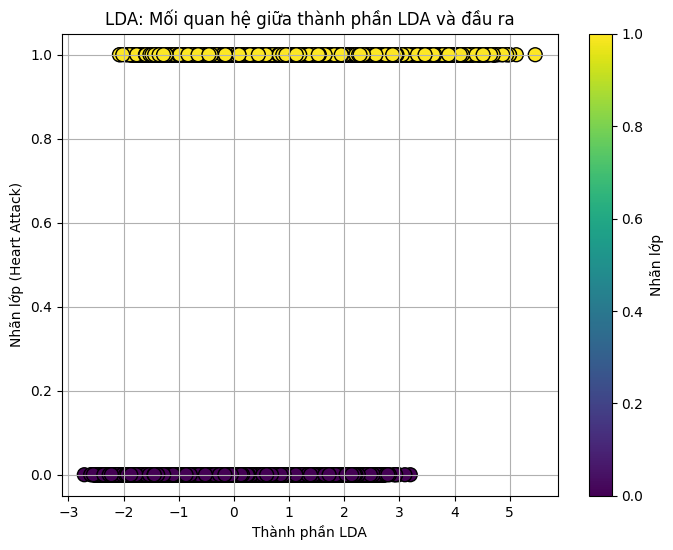


Hệ số tương quan Pearson giữa thành phần LDA và nhãn lớp: 0.5204

So sánh giữa PCA và LDA:
Phương sai giải thích PCA: 0.9630070410387539 (95%)
Phương sai giải thích LDA: 1.0


In [ ]:
# Phương pháp PCA
pca = PCA(n_components=0.95)  # Tự động chọn số chiều giữ lại 95% phương sai
X_reduced_PCA = pca.fit_transform(X_scaled)
print(f"\nPCA giữ lại {X_reduced_PCA.shape[1]} chiều (để giữ lại 95% phương sai).")
# Hiển thị phương sai giải thích của PCA
print(f"\nPhương sai giải thích của PCA:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Component {i+1}: {var:.4f}")
print(f"Tổng phương sai giải thích: {pca.explained_variance_ratio_.sum():.4f} (95%)")

# Vẽ biểu đồ phương sai tích lũy
plt.figure(figsize=(8, 5))
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(explained_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title("Cumulative Explained Variance - PCA")
plt.xlabel("Số chiều giữ lại")
plt.ylabel("Tỷ lệ phương sai tích lũy")
plt.grid(True)
plt.show()

# Trực quan hóa mối quan hệ giữa 2 thành phần chính với đầu ra (y)
plt.figure(figsize=(8, 6))

# Vẽ scatter plot giữa hai thành phần chính đầu tiên và phân loại theo nhãn y
scatter = plt.scatter(X_reduced_PCA[:, 0], X_reduced_PCA[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)

# Thêm tiêu đề và nhãn
plt.title("PCA: Mối quan hệ giữa các thành phần chính và đầu ra")
plt.xlabel("Thành phần chính 1")
plt.ylabel("Thành phần chính 2")

# Thêm thanh màu để thể hiện các nhãn lớp
plt.colorbar(scatter, label='Nhãn lớp')

# Hiển thị đồ thị
plt.grid(True)
plt.show()

# Kiểm tra tương quan tuyến tính giữa thành phần PCA (2 chiều) và nhãn lớp (y)
# Tính hệ số tương quan Pearson giữa mỗi thành phần PCA và nhãn lớp y
correlation_pca1 = np.corrcoef(X_reduced_PCA[:, 0], y)[0, 1]
print(f"\nHệ số tương quan Pearson giữa thành phần PCA 1 và nhãn lớp: {correlation_pca1:.4f}")
correlation_pca2 = np.corrcoef(X_reduced_PCA[:, 1], y)[0, 1]
print(f"Hệ số tương quan Pearson giữa thành phần PCA 2 và nhãn lớp: {correlation_pca2:.4f}")

# Phương pháp LDA
lda = LDA(n_components=1)  # Vì có 2 lớp => tối đa là 1
X_reduced_LDA = lda.fit_transform(X_scaled, y)
print(f"\nLDA giảm chiều còn: {X_reduced_LDA.shape[1]} chiều.")
print(f"\nPhương sai giải thích của LDA:")
for i, var in enumerate(lda.explained_variance_ratio_):
    print(f"Component {i+1}: {var:.4f}")
print(f"Tổng phương sai giải thích: {lda.explained_variance_ratio_.sum():.4f}")

# Vẽ biểu đồ phương sai tích lũy (LDA chỉ có 1 chiều)
plt.figure(figsize=(8, 5))
explained_variance = lda.explained_variance_ratio_
plt.bar(range(1), explained_variance, color='b')
plt.title("Explained Variance - LDA")
plt.xlabel("Số chiều")
plt.ylabel("Tỷ lệ phương sai giải thích")
plt.show()

plt.figure(figsize=(8, 6))

# Vẽ scatter plot giữa thành phần LDA (1 chiều) và nhãn lớp y
scatter = plt.scatter(X_reduced_LDA, y, c=y, cmap='viridis', edgecolor='k', s=100)

# Thêm tiêu đề và nhãn
plt.title("LDA: Mối quan hệ giữa thành phần LDA và đầu ra")
plt.xlabel("Thành phần LDA")
plt.ylabel("Nhãn lớp (Heart Attack)")

# Thêm thanh màu để thể hiện các nhãn lớp
plt.colorbar(scatter, label='Nhãn lớp')

# Hiển thị đồ thị
plt.grid(True)
plt.show()

# Kiểm tra tương quan tuyến tính giữa thành phần LDA và nhãn lớp (y)
# Tính hệ số tương quan Pearson giữa thành phần LDA và nhãn lớp
correlation_lda = np.corrcoef(X_reduced_LDA.T, y)[0, 1]
print(f"\nHệ số tương quan Pearson giữa thành phần LDA và nhãn lớp: {correlation_lda:.4f}")

## So sánh giữa PCA và LDA
print("\nSo sánh giữa PCA và LDA:")
print(f"Phương sai giải thích PCA: {pca.explained_variance_ratio_.sum()} (95%)")
print(f"Phương sai giải thích LDA: {lda.explained_variance_ratio_.sum()}")

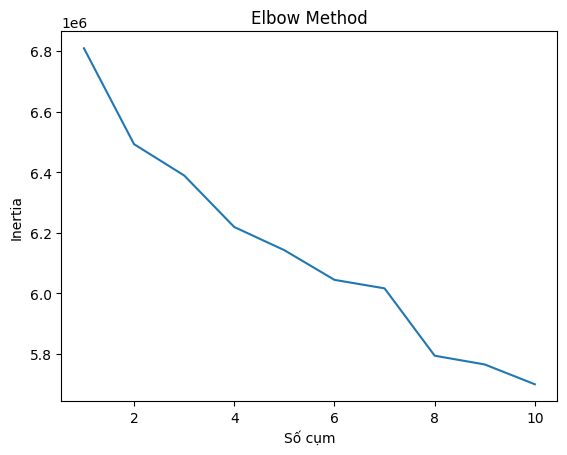

KMeans Converged in 17 iterations.


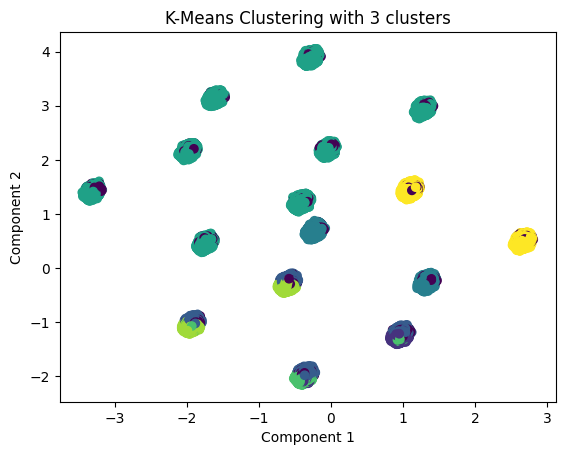

In [10]:
# Phương pháp Elbow để xác định số cụm tối ưu
inertia = []
for k in range(1, 11):  # từ 1 đến 10 cụm
    kmeans = KMeans(n_clusters=k, random_state=42)  # Đảm bảo tính lặp lại kết quả
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.plot(range(1, 11), inertia)
plt.xlabel('Số cụm')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Chọn số cụm tối ưu dựa trên kết quả Elbow
optimal_k = int(input("\nNhập số cụm tối ưu: "))

# Thực hiện phân cụm với số cụm tối ưu
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_reduced_PCA)

kmeans = KMeans(n_clusters=8, max_iter=300, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
print(f"KMeans Converged in {kmeans.n_iter_} iterations.")

# Trực quan hóa các cụm trong không gian 2D (giả sử dữ liệu có thể giảm xuống 2 chiều)
plt.scatter(X_reduced_PCA[:, 0], X_reduced_PCA[:, 1], c=kmeans_labels, cmap='viridis')
plt.title(f'K-Means Clustering with {optimal_k} clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


Ma trận nhầm lẫn:
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |       14369       |    4537     |
|    Thực tế: Bị    |       4356        |    8409     |
+-------------------+-------------------+-------------+

Kết quả:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.77        │ 0.76     │       0.76 │     18906 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.65        │ 0.66     │       0.65 │     12765 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │          │       0.72 │     31671 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ macro avg    │ 0.71        │ 0

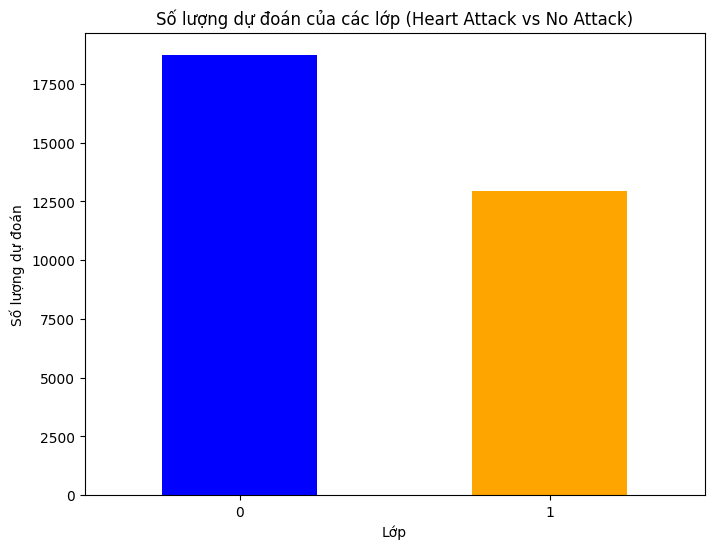

In [12]:
# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Huấn luyện mô hình Naive Bayes
clf = GaussianNB()
clf.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = clf.predict(X_test)

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
headers = ["", "Dự đoán: Không bị", "Dự đoán: Bị"]
table = [
    ["Thực tế: Không bị", cm[0][0], cm[0][1]],
    ["Thực tế: Bị",        cm[1][0], cm[1][1]]
]
print("\nMa trận nhầm lẫn:")
print(tabulate(table, headers=headers, tablefmt="pretty"))

# Classification report
report_dict = classification_report(y_test, y_pred, output_dict=True)
table = []
total_support = len(y_test)
for label, metrics in report_dict.items():
    if isinstance(metrics, dict):
        row = [label]
        row += [f"{metrics[col]:.2f}" for col in ["precision", "recall", "f1-score", "support"]]
        table.append(row)
    elif label == "accuracy":
        table.append(["accuracy", "", "", f"{metrics:.2f}", f"{total_support}"])

headers = ["Label", "Precision", "Recall", "F1-Score", "Support"]
print("\nKết quả:")
print(tabulate(table, headers=headers, tablefmt="fancy_grid"))

class_counts = pd.Series(y_pred).value_counts()
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Số lượng dự đoán của các lớp (Heart Attack vs No Attack)')
plt.xlabel('Lớp')
plt.ylabel('Số lượng dự đoán')
plt.xticks(rotation=0)
plt.show()